# Predicting World Happiness Score Using Tree-Based Regression Models  
**Author:** Giovanna Cardenas  
**Date:** May 2025  
**Description:** This notebook predicts the World Happiness Score based on various socioeconomic indicators using multiple tree-based regression models. Models include Decision Tree, Random Forest, Bagging, and Gradient Boosting. Model performance is evaluated using RMSE and correlation on a test set.

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [51]:
# load data
myData = pd.read_csv('WorldHappinessData.csv')
myData.head(6)

,Happiness_Score,Economy,Family,Life_Expectancy,Freedom,Trust,Generosity
0,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492
5,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834


In [53]:
# split into training and testing data
x = myData.drop('Happiness_Score', axis = 1)
y = myData['Happiness_Score']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.20, random_state = 3)

12


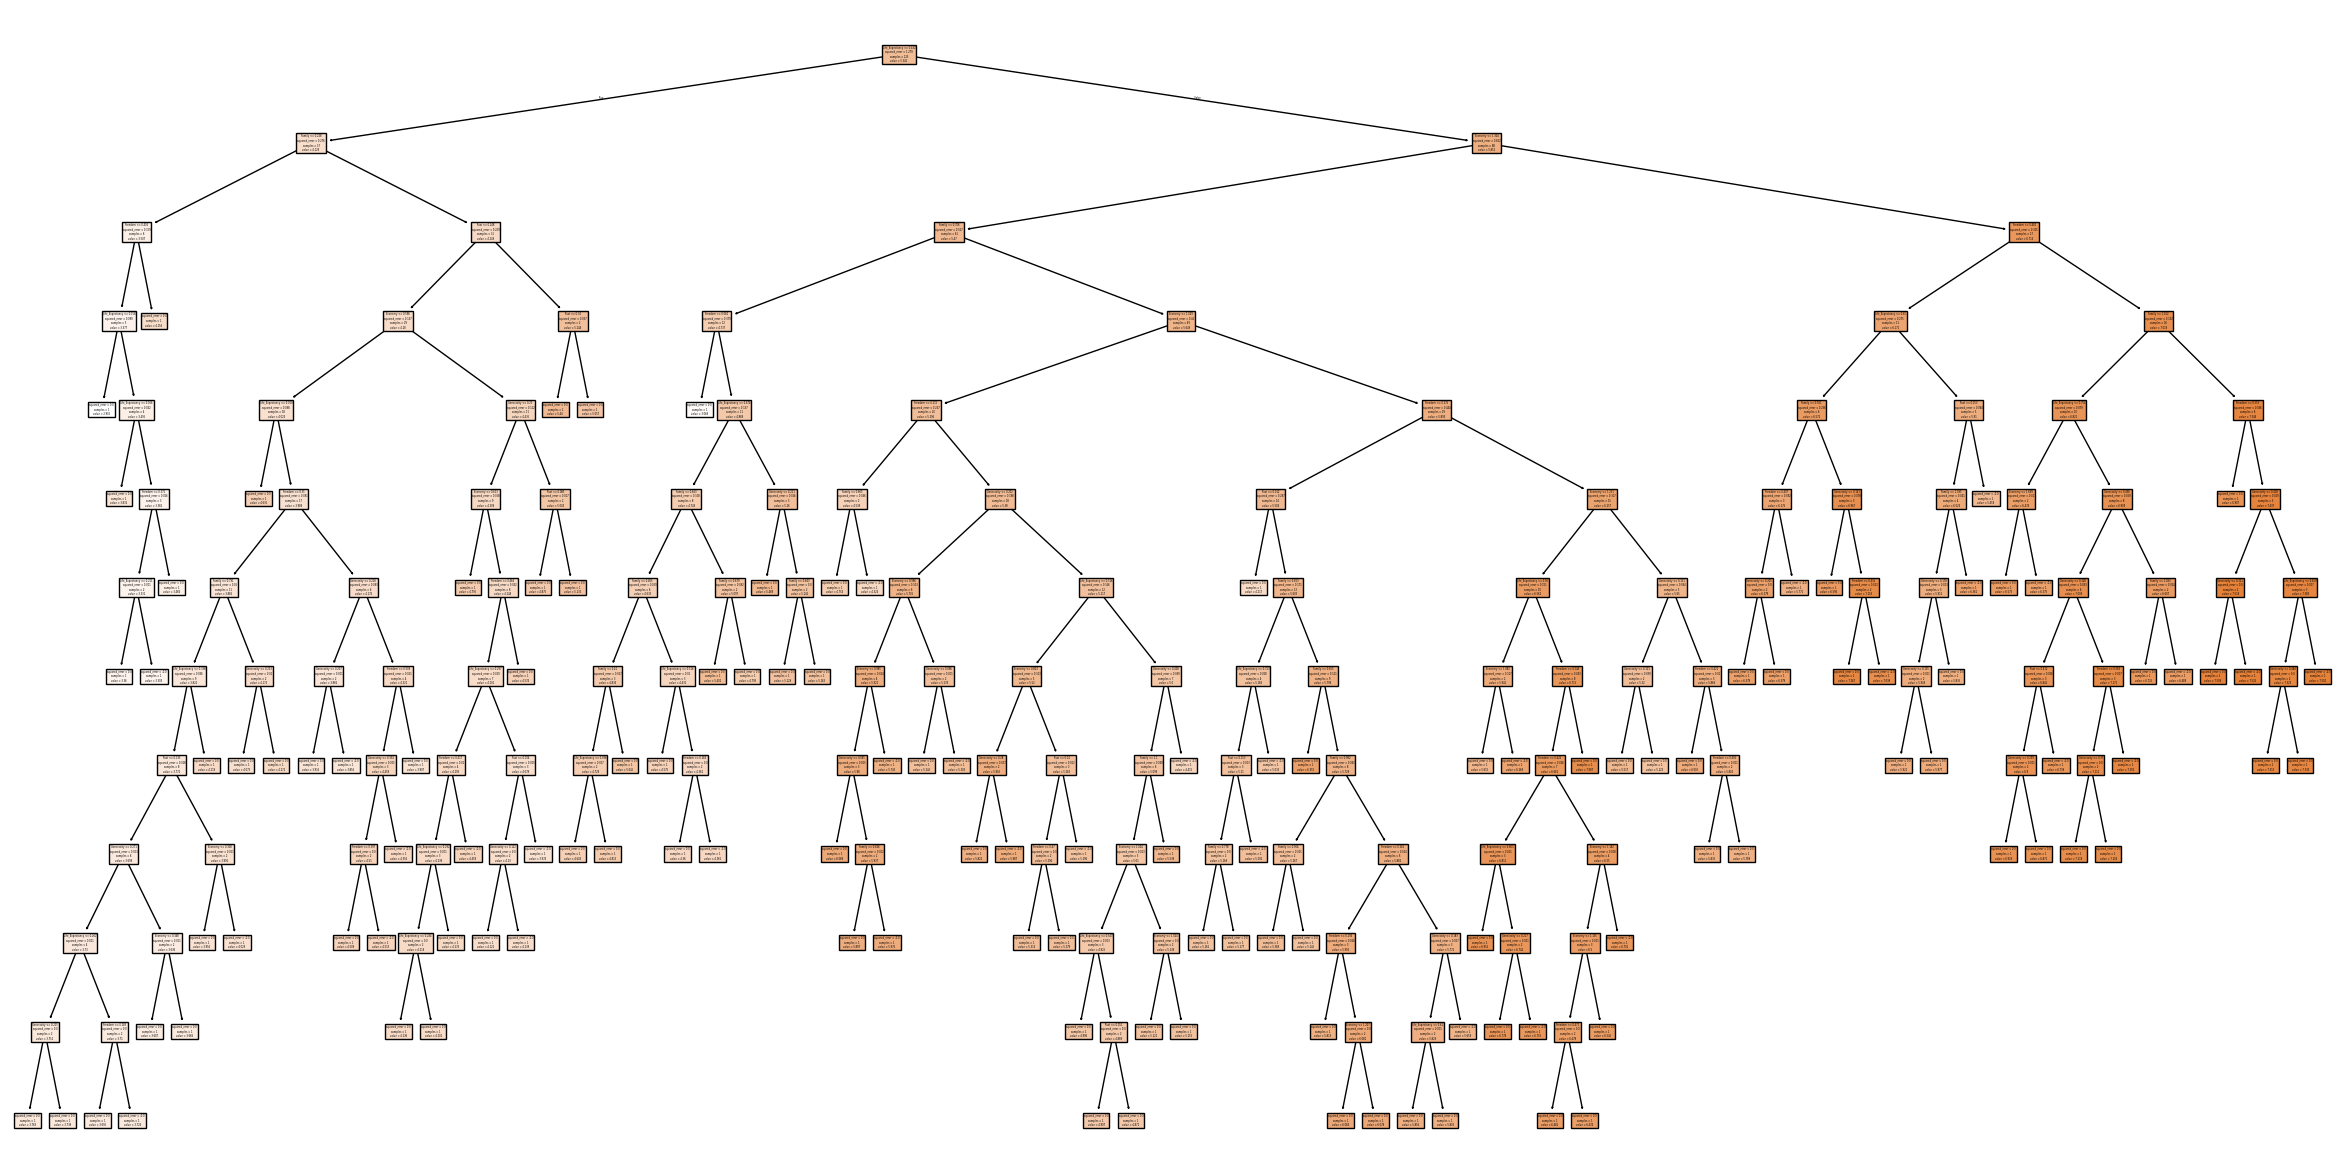

In [55]:
# # Fit and plot a fully grown Decision Tree Regressor
rt = DecisionTreeRegressor(max_depth = None, min_samples_split = 2, random_state= 3)
rt.fit(xTrain, yTrain)
fig =plt.figure(figsize=(30,15))
tree.plot_tree(rt, filled = True, feature_names=xTrain.columns)
print(rt.tree_.max_depth)

In [56]:
# Create predictions and use accuracy measure RMSE
testPredictions= rt.predict(xTest)
r = round(MSE(yTest, testPredictions)**0.5,2)
print("test RMSE:", r)
c = np.corrcoef(yTest, testPredictions)[0,1]
print("test corr:", round(c,3))

test RMSE: 0.68
test corr: 0.818


In [57]:
# Random Forest Regressor with accuracy measures
rf = RandomForestRegressor(n_estimators = 1000, min_samples_split = 2, random_state = 3)
rf.fit(xTrain, yTrain)
rfPredictions = rf.predict(xTest)
r2 = round(MSE(yTest, rfPredictions)**0.5,3)
print("test RMSE:", r2)
c2 = np.corrcoef(yTest, rfPredictions)[0,1]
print("test corr:", round(c2,3))

test RMSE: 0.433
test corr: 0.937


In [ ]:
#visualize random tree estimator
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,15), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [ ]:
# Bagging Regressor with accuracy measures
br = BaggingRegressor(estimator = rt, n_estimators = 1000)
br.fit(xTrain, yTrain)
brPredictions = br.predict(xTest)
r3 = round(MSE(yTest, brPredictions)**0.5,3)
print("test RMSE:", r3)
c3 = np.corrcoef(yTest, brPredictions)[0,1]
print("test corr:", round(c3,3))

In [ ]:
# Boosting Regressor (for bias, which is not the correct method, method for variability is needed) with accuracy measures

gbr = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.01, max_depth = None, random_state = 3)
gbr.fit(xTrain, yTrain)
gbrTestPredictions = gbr.predict(xTest)
gbrTrainPredictions = gbr.predict(xTrain)
r4 = round(MSE(yTest, gbrTestPredictions)**0.5,3)
print("test RMSE:", r4)
c4 = np.corrcoef(yTest, gbrTestPredictions)[0,1]
print("test corr:", round(c4,3))
r5 = round(MSE(yTrain, gbrTrainPredictions)**0.5,3)
print("\ntrain RMSE:", r5)
c5 = np.corrcoef(yTrain, gbrTrainPredictions)[0,1]
print("train corr:", round(c5,3))

### Bagged Tree is best model by a small margin with random forest estimator being second best.